In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import argparse
from tueplots import bundles
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 150})

In [2]:
# Adjust the following paths to your own
CHARTS_PATH = "../../dataset/charts_processed.csv"

In [3]:
df = pd.read_csv(CHARTS_PATH)

In [4]:
df.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')

In [5]:
def retrieve_yearly_data(df, year):
    """
    Retrieve the data for a given year
    """
    return df.loc[df['year'] == year]

def retrieve_monthly_data(df, year, month):
    """
    Retrieve the data for a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month)]

def retrieve_daily_data(df, year, month, day):
    """
    Retrieve the data for a given day of a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

In [6]:
"""
Composite functions:
The idea is to make it easier for the user to retrieve the data user wants
based on country and year.
"""

def plot_streams_per_rank(df, country, year):
    """
    Plot the average number of daily streams per rank for a given year
    """
    df_country = df.loc[df['region'] == country]
    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    
    df_country = df_country.loc[df_country['year'] == year]
    streams_per_rank = df_country.groupby(['rank'])['streams'].mean()
    x = streams_per_rank.index
    y = streams_per_rank.values

    # get standard deviations for each rank
    std = df_country.groupby(['rank'])['streams'].std()
    std = std.values
    
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    
    formatter = plt.FuncFormatter(thousands)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average number of daily streams")
    plt.fill_between(x, y-std, y+std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Average number of daily streams per rank in " + country + " in " + str(year))
    plt.show()

def plot_streams_per_rank_all_years(df, country):
    # do the same thing for 2017, 2018, 2019, 2020, 2021 and plot them all in one figure
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for year in range(2017, 2022):
        df_year = df_country.loc[df_country['year'] == year]
        streams_per_rank = df_year.groupby(['rank'])['streams'].mean()
        x = streams_per_rank.index
        y = streams_per_rank.values
        ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")
    formatter = plt.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Average number of daily streams per rank in " + country + " in 2017-2021")
    plt.show()
    
    

C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

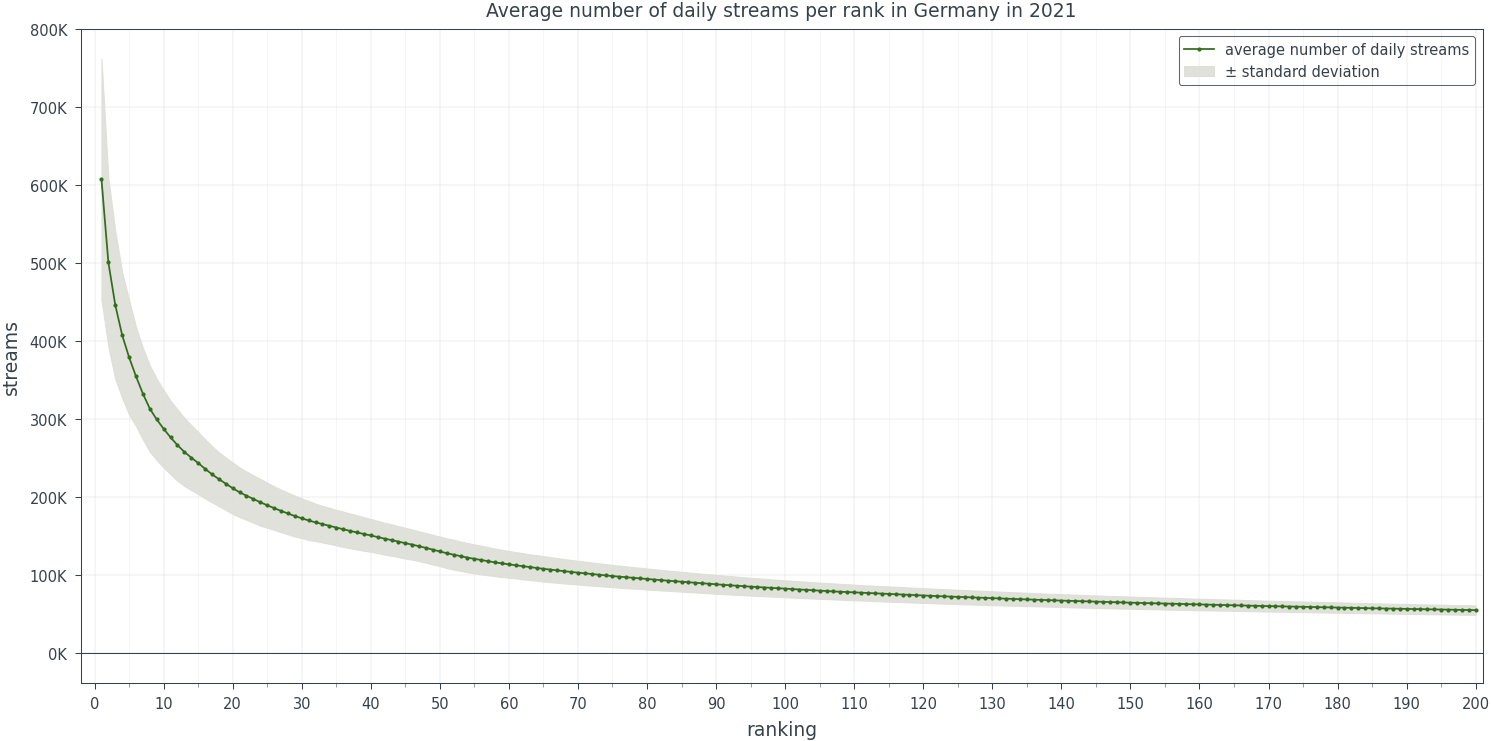

In [ ]:
# for each rank, get number of streams and plot it where x axis is rank, y axis is number of streams
plot_streams_per_rank(df, "Germany", 2021)

C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\1081765338.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

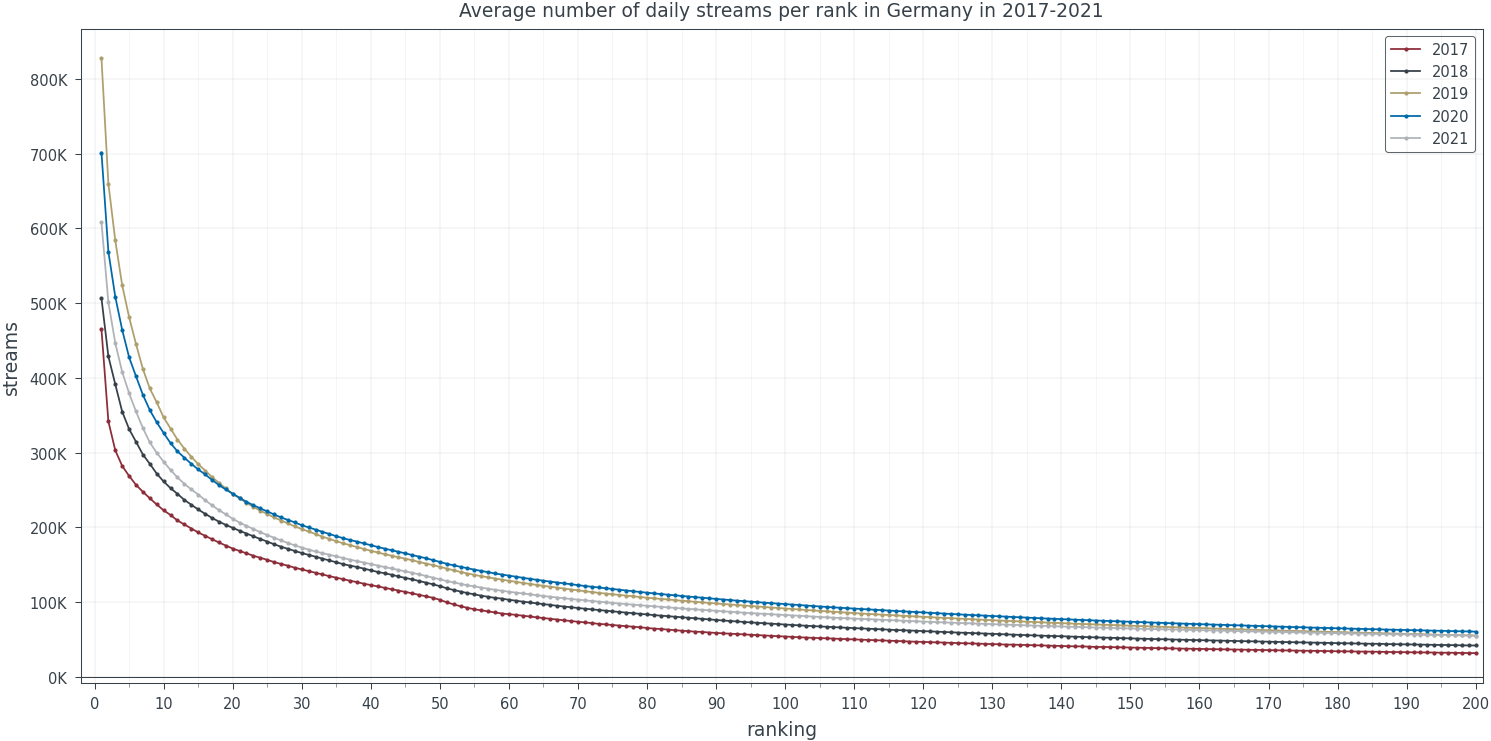

In [8]:
plot_streams_per_rank_all_years(df, "Germany")

In [9]:
# get the The number of unique songs observed in the data at each position in the Top 200 throughout the year

def plot_nunique_songs_by_rank(df, country, year):
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    
    df_country = df_country.loc[df_country['year'] == year]
    df_country = df_country.loc[df_country['chart'] == "top200"]
    nunique_songs = df_country.groupby(['rank'])['title'].nunique()
    
    x = nunique_songs.index
    y = nunique_songs.values
    ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("number of unique songs")
    ax.legend(loc="upper left")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
    
    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Number of unique songs observed in the data at each position in the Top 200 in " + country + " in " + str(year))
    plt.show()
    
def plot_nunique_songs_by_rank_for_all_years(df, country):
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    
    for year in range(2017, 2022):
        df_year = df_country.loc[df_country['year'] == year]
        df_year = df_year.loc[df_year['chart'] == "top200"]
        nunique_songs = df_year.groupby(['rank'])['title'].nunique()
        
        x = nunique_songs.index
        y = nunique_songs.values
        ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("number of unique songs")
    ax.legend(loc="upper left")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    
    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Number of unique songs observed in the data at each position in the Top 200 in " + country + " in 2017-2021")
    plt.show()

C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

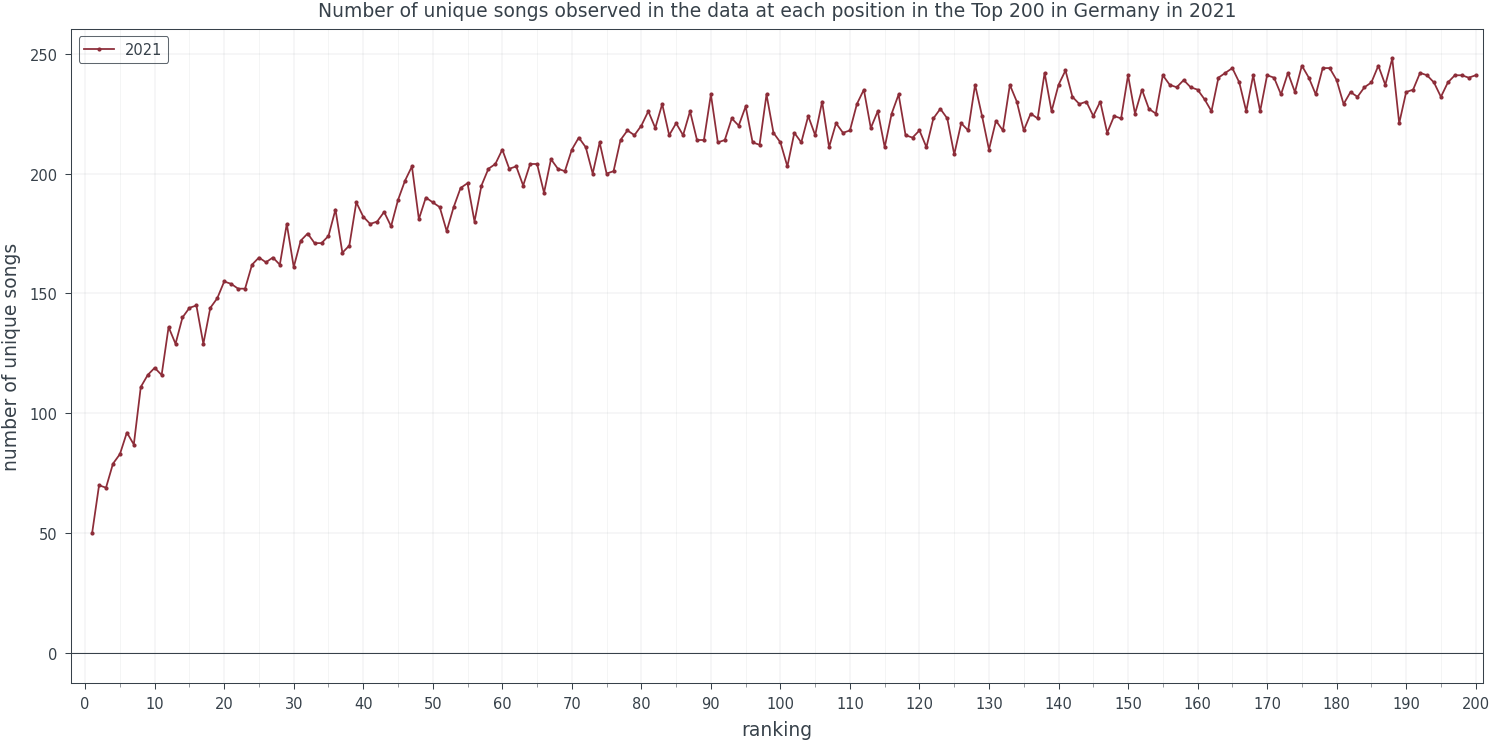

In [10]:
plot_nunique_songs_by_rank(df, "Germany", 2021)

C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
C:\Users\karab\AppData\Local\Temp\ipykernel_8804\2955830455.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

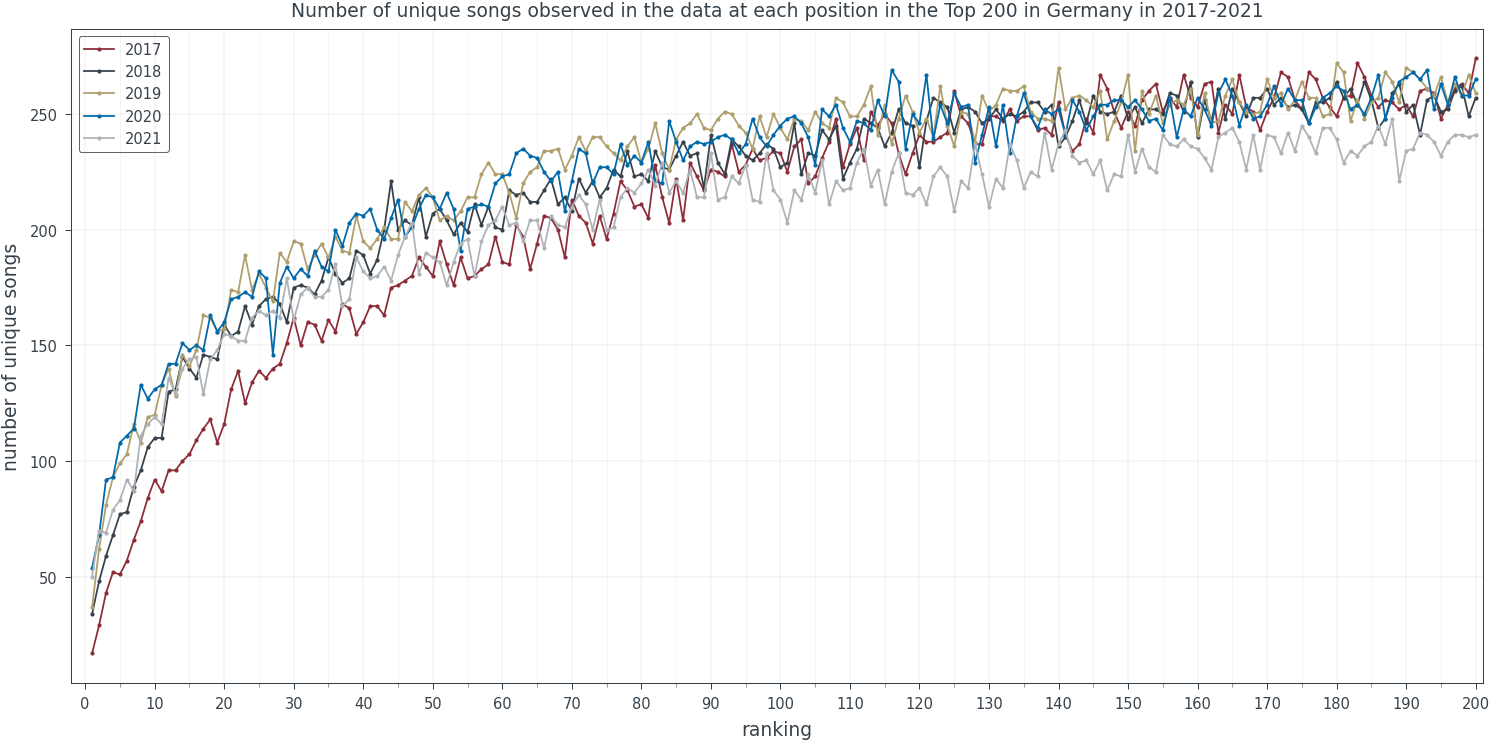

In [11]:
plot_nunique_songs_by_rank_for_all_years(df, "Germany")

In [12]:
# for 2021, get the most listened song in total for each country

df_2021 = df[df['date'].str.contains("2021")]
# get the most listened song in total for each country
most_listened = df_2021.groupby(['region', 'title'])['streams'].sum().groupby(level=0, group_keys=False).nlargest(1)

In [13]:
most_listened

region                title                         
Andorra               #RapSinCorte L                            0.0
Argentina             Miénteme                           68688945.0
Australia             Heat Waves                         69356736.0
Austria               STAY (with Justin Bieber)           6590576.0
Belgium               MONTERO (Call Me By Your Name)     10701941.0
                                                           ...     
United Arab Emirates  STAY (with Justin Bieber)           2169036.0
United Kingdom        good 4 u                           91271442.0
United States         good 4 u                          316909493.0
Uruguay               Miénteme                            4416614.0
Vietnam               Chúng Ta Của Hiện Tại              11477487.0
Name: streams, Length: 70, dtype: float64

In [14]:
import pygal.maps.world

# Create a world map object
worldmap = pygal.maps.world.World()

# Set the title of the map
worldmap.title = 'Countries of the World'

# Add data to the map
worldmap.add('Countries', [('ca', 1), ('us', 1), ('mx', 1)])  # Canada, USA, Mexico

# Render the map to an SVG file
worldmap.render_to_file('countries_map.svg')

ModuleNotFoundError: No module named 'pygal'